## 1. Prévision d'un prix dans le futur

Imaginons une action au prix actule de 100€, une volatilité annuelle de 20%.     

On calcul sa volatilité annuelle par 20% / sqrt(252) = 1.25%
252 étant le nombre de jours ouvrés

Prix du jour suivant = prix actuel * (1+variation aléatoire)

Pour calculer la variation aléatoire on suit une loi normale centrée en 0 d'écart type 1.25%

In [2]:
import numpy as np

# Fonction monteCarlo qui calcul des variations aléatoire, en fonction d'une distribution normale , log normale, ou uniforme
# Affichage des résultats moyens, des valeurs maximale et minimales des valeurs
def MonteCarloSimulation(set_prix_actuel=100,set_volatilité_annuelle=0.2, set_nb_jour_marché=252, n_simu= 10000, distribution = "normale"):

    list_final_prices = []
    list_prices = []    
    variations = []

    for i in range(n_simu):

        ##variables
        prix_actuel = set_prix_actuel
        volatilité_annuelle = set_volatilité_annuelle
        nb_jour_marché = set_nb_jour_marché

        ## Calcul 
        volatilité_quotidienne = volatilité_annuelle/np.sqrt(nb_jour_marché)
        
        for i in range (nb_jour_marché):
            if distribution =="normale" :
                varia_alea = np.random.normal(0,volatilité_quotidienne)
            elif distribution =="log-normale":
                varia_alea = np.random.lognormal(0,volatilité_quotidienne)
            elif distribution =="uniforme":
                varia_alea = np.random.uniform(-volatilité_quotidienne,volatilité_quotidienne)
            else:
                print("choisissez une distribution normale ou uniforme")
                return [0],[0],[0]

            nouveau_prix = prix_actuel*(1+varia_alea)
            
            variations.append(prix_actuel-nouveau_prix)
            
            prix_actuel = nouveau_prix

            list_prices.append(prix_actuel)
        list_final_prices.append(prix_actuel)
    return list_prices, list_final_prices, variations


n_simu = 10000

list_prices_normal, list_final_prices_normal,variations_normal = MonteCarloSimulation(n_simu=n_simu,distribution = "normale")
print(min(list_prices_normal),max(list_prices_normal),
      np.min(list_final_prices_normal), np.max(list_final_prices_normal), np.mean(list_final_prices_normal),np.median(list_final_prices_normal))

list_prices_logNormal, list_final_prices_logNormal,variations_logNormal = MonteCarloSimulation(n_simu=n_simu,distribution = "log-normale")
print(min(list_prices_logNormal),max(list_prices_logNormal),np.mean(list_final_prices_logNormal))

45.02668063994744 233.38355562108404 46.34087468289522 218.0628491427447 99.98599154461435 98.30719913562518
195.79111101104192 1.095678257734427e+78 7.30961013138513e+77


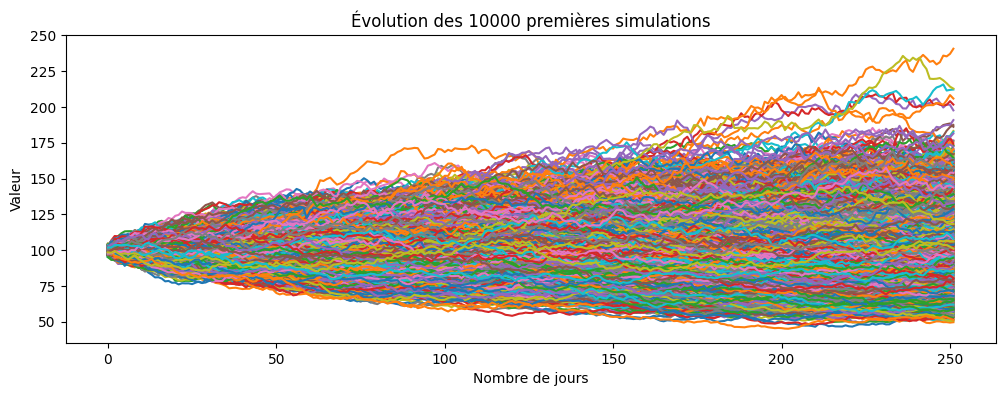

In [2]:
# Evoltion du prix de toutes les simulations

import matplotlib.pyplot as plt
list_prices_2D = np.array(list_prices_normal).reshape(n_simu,252)
#list_prices_2D = list_prices_2D[:250]

plt.figure(figsize=(12, 4))
for i, simulation in enumerate(list_prices_2D):
    plt.plot(simulation)

plt.title(f"Évolution des {list_prices_2D.shape[0]} premières simulations")
plt.xlabel("Nombre de jours")
plt.ylabel("Valeur")
plt.show()

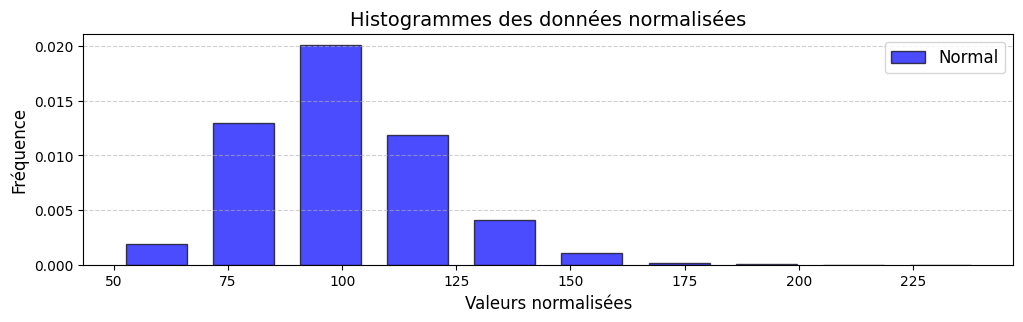

In [4]:
## histogramme des valeurs à expiration

normal_normalized = (list_final_prices_normal - np.min(list_final_prices_normal)) / (np.max(list_final_prices_normal) - np.min(list_final_prices_normal))
lognormal_normalized = (list_final_prices_logNormal - np.min(list_final_prices_logNormal)) / (np.max(list_final_prices_logNormal) - np.min(list_final_prices_logNormal))

plt.figure(figsize=(12, 3))
plt.hist(list_final_prices_normal,color='blue', alpha=0.7, edgecolor='black',rwidth=0.7, label='Normal',density='True')
#plt.hist(list_final_prices_logNormal,color='green', alpha=0.7, edgecolor='black',rwidth=0.7, label='LogNormal Normalized',density=True)

plt.xlabel('Valeurs normalisées', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Histogrammes des données normalisées', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## 2 Calcul Valeur Option Financière

La valeur de l'option se traduit par max(0,prix de l'action dans un an - 100)

en moyenne le prix de l'option est de 8€

In [126]:
valeur_options = np.maximum(0,np.array(list_final_prices_normal)-100)

np.mean(valeur_options)

np.float64(8.061652532018735)

## 3 Evaluer le risque de portefeuille

On a 3 actions, chacune avec un prix de 50, 100 et 150  
On aditionne les valeurs finales, et on regarde le total, et pour combien de simulations on a moins de 90% du total du prix ( < 0.9*300)

In [146]:
list_prices, list_final_prices_50,variations = MonteCarloSimulation(set_prix_actuel=50, set_volatilité_annuelle=0.15,n_simu=10000,distribution = "normale")
print(min(list_prices),max(list_prices),np.mean(list_final_prices_50))

list_prices, list_final_prices_100,variations = MonteCarloSimulation(set_prix_actuel=100, set_volatilité_annuelle=0.15,n_simu=10000,distribution = "normale")
print(min(list_prices),max(list_prices),np.mean(list_final_prices_100))

list_prices, list_final_prices_150,variations = MonteCarloSimulation(set_prix_actuel=150, set_volatilité_annuelle=0.15,n_simu=10000,distribution = "normale")
print(min(list_prices),max(list_prices),np.mean(list_final_prices_150))

27.72140802511149 92.83527686959755 49.96036746538594
52.48473660177742 177.0067218912611 99.82341506863999
82.18059665410426 291.7969876255405 149.80612503878993


In [147]:
list_final_prices_50_ar = np.array(list_final_prices_50)
list_final_prices_100_ar = np.array(list_final_prices_100)
list_final_prices_150_ar = np.array(list_final_prices_150)

sum_array = list_final_prices_50_ar+list_final_prices_100_ar+list_final_prices_150_ar



In [165]:
threshold = 0.9 * 300

bool_array = sum_array < threshold

print(bool_array)

count_below_threshold = np.sum(bool_array)
print(count_below_threshold)

print(count_below_threshold/n_simu*100)

[False False False ...  True  True False]
1406
14.06


D'apres les calculs, en se basant sur un portefeuille composé d'actions ayant des valeurs initiales de 50, 100 ou 150. 
14% des simulations sont en dessous du seuil choisi